In [78]:
#Load the necessory packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
eeg_data = pd.read_csv("data.csv")

In [80]:
eeg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Signal to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [81]:
#Display one row of EEG Data 
eeg_data.head(1)

,Signal,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4


In [82]:
# Check the lables of the Class
eeg_data['y'].unique()

array([4, 1, 5, 2, 3])

In [83]:
# Convert the 5 classes into binary class
def convert_binary_class(y):
    if y == 2 or y == 3 or y == 4 or y == 5 :
        return 0
    else :
        return 1

In [84]:
# Apply above function to convert into binary class
eeg_data['y'] = eeg_data['y'].apply(convert_binary_class)

In [85]:
eeg_data.head(3)

,Signal,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0


In [86]:
# Remove unnecessory columns that is the name of the signal
del eeg_data['Signal']

In [87]:
eeg_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0


In [88]:
eeg_X = eeg_data.drop('y',axis=1)

In [89]:
eeg_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [90]:
#standardization
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(eeg_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
scaled_features = scaler.transform(eeg_X)

In [94]:
eeg_feature = pd.DataFrame(scaled_features)
eeg_feature.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858


In [95]:
#dimensionality reduction using PCA
from sklearn.decomposition import PCA

In [96]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
eeg_reduced = pca.fit_transform(eeg_feature)

In [97]:
# Show results
print('Original number of features:', eeg_X.shape[1])
print('Reduced number of features:', eeg_reduced.shape[1])

Original number of features: 178
Reduced number of features: 53


In [98]:
eeg_dataframe = pd.DataFrame(eeg_reduced)

In [99]:
eeg_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.043509,-0.375375,0.281512,-0.024253,-0.063223,-0.303915,0.289227,0.128180,1.074702,-0.298357,...,0.372731,0.023593,0.790203,-0.188762,0.349138,-1.147314,-0.379314,0.175106,-0.728472,-0.800708
1,-0.539223,-1.192899,2.070010,2.740819,1.624626,2.168942,1.398922,-2.203772,1.639739,4.545231,...,2.308845,-1.623800,0.397833,-0.975898,-4.293730,-4.611685,0.296611,-3.940340,3.732903,-1.830272
2,0.156865,-0.085676,0.313239,-0.226469,0.566934,-0.590708,-0.327858,-0.604370,-0.156976,-0.582791,...,-0.479826,-0.042017,-0.707656,0.031624,-0.327688,-0.142435,0.267227,0.544947,-0.343651,-0.106182
3,-0.055137,0.081713,-0.024773,-0.036863,0.576860,-1.154347,-0.208306,-1.151407,-0.087217,-0.595318,...,-0.172949,-0.205241,0.055620,0.263795,-0.126503,0.180488,-0.033139,-0.095133,-0.114136,-0.005011
4,-0.075691,0.038409,0.163648,-0.181038,0.067041,-0.136617,-0.017070,0.182833,-0.037164,0.219899,...,0.345469,0.292126,-0.165714,-0.954926,0.532929,1.201546,0.573182,0.510219,0.717645,-0.631617


# Feature Extraction

In [100]:
from nitime import utils
from nitime import algorithms as alg
from nitime.timeseries import TimeSeries
from nitime.viz import plot_tseries
import csv
import pywt
import scipy.stats as sp
from spectrum import *
from os import listdir
from os.path import isfile, join

## Hjorth Parameters

In [101]:
def hjorth(input):
    realinput = input
    hjorth_activity = np.zeros(len(realinput))
    hjorth_mobility = np.zeros(len(realinput))
    hjorth_diffmobility = np.zeros(len(realinput))
    hjorth_complexity = np.zeros(len(realinput))
    diff_input = np.diff(realinput)
    diff_diffinput = np.diff(diff_input)
    k = 0
    for j in realinput:
        hjorth_activity[k] = np.var(j)
        hjorth_mobility[k] = np.sqrt(np.var(diff_input[k])/hjorth_activity[k])
        hjorth_diffmobility[k] = np.sqrt(np.var(diff_diffinput[k])/np.var(diff_input[k]))
        hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]
        k = k+1
    return hjorth_activity, hjorth_mobility, hjorth_complexity

In [102]:
Activity,Mobility,Complexity = hjorth(np.array(eeg_dataframe))

In [103]:
Activity

array([0.38486924, 7.84892695, 0.1087764 , ..., 0.10109846, 0.13384051,
       0.10246089])

In [104]:
Mobility

array([1.44872525, 1.30001803, 1.47411129, ..., 1.3446315 , 1.5995467 ,
       1.45271846])

In [105]:
Complexity

array([1.20433814, 1.32146911, 1.24255853, ..., 1.27329838, 1.17561793,
       1.15276398])

In [106]:
print(Activity.shape)
print(Mobility.shape)
print(Complexity.shape)

(11500,)
(11500,)
(11500,)


## Kurtosis , 2nd Diff Mean, 2nd Diff Max

In [107]:
def my_kurtosis(a):
    b = a # Extracting the data from the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    k = 0; # For counting the current row no.
    for i in b:
        mean_i = np.mean(i) # Saving the mean of array i
        std_i = np.std(i) # Saving the standard deviation of array i
        t = 0.0
        for j in i:
            t += (pow((j-mean_i)/std_i,4)-3)
        kurtosis_i = t/len(i) # Formula: (1/N)*(summation(x_i-mean)/standard_deviation)^4-3
        output[k] = kurtosis_i # Saving the kurtosis in the array created
        k +=1 # Updating the current row no.
    return output

##----------------------------------------- End Kurtosis Function ----------------------------##


##------------------------------------- Begin 2ndDiffMean(Absolute difference) Function ------##
##-------------------------- [ Input: 2D array (row: Channels, column: Data)] --------------- ##
##-------------------  -- [ Output: 1D array (2ndDiffMean values for each channel)] ----------##

def secDiffMean(a):
    b = a # Extracting the data of the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    for i in b:
        t = 0.0
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        for j in range(len(i)-2):
            t += abs(temp1[j+1]-temp1[j]) # Summing the 2nd Diffs
        output[k] = t/(len(i)-2) # Calculating the mean of the 2nd Diffs
        k +=1 # Updating the current row no.
    return output

##------------------------------------- End 2ndDiffMean Function----- -------------------------##


##------------------------------------- Begin 2ndDiffMax Function(Absolute difference) --------##
##-------------------------- [ Input: 2D array (row: Channels, column: Data)] -----------------##
##--------------------- [ Output: 1D array (2ndDiffMax values for each channel)] --------------##

def secDiffMax(a):
    b = a # Extracting the data from the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    t = 0.0
    for i in b:
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        t = temp1[1] - temp1[0]
        for j in range(len(i)-2):
            if abs(temp1[j+1]-temp1[j]) > t :
                t = temp1[j+1]-temp1[j] # Comparing current Diff with the last updated Diff Max

        output[k] = t # Storing the 2nd Diff Max for channel k
        k +=1 # Updating the current row no.
    return output



def wrapper1(a):
    kurtosis =  my_kurtosis(a)
    sec_diff_mean = secDiffMean(a)
    sec_diff_max  = secDiffMax(a)
    return kurtosis,sec_diff_mean,sec_diff_max

In [108]:
Kurtosis,Second_Difference_Mean, Second_Difference_Max = wrapper1(np.array(eeg_dataframe))

In [109]:
print(Kurtosis)
print(Second_Difference_Mean)
print(Second_Difference_Max)
print(Kurtosis.shape)
print(Second_Difference_Mean.shape)
print(Second_Difference_Max.shape)

[ 0.25579247  0.3921014  -0.73821004 ...  0.33843975  0.27688753
  1.01344204]
[0.5584611  2.36778248 0.26967646 ... 0.26848724 0.26115313 0.24909296]
[1.87478011 7.06913013 0.9148294  ... 0.5181105  0.9685372  0.88890145]
(11500,)
(11500,)
(11500,)


## Coefficient of Variation

In [110]:
def coeff_var(a):
    b = a #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    k = 0; #For counting the current row no.
    for i in b:
        mean_i = np.mean(i) #Saving the mean of array i
        std_i = np.std(i) #Saving the standard deviation of array i
        output[k] = std_i/mean_i #computing coefficient of variation
        k=k+1
    return output

In [111]:
Coeffiecient_of_Variation = coeff_var(np.array(eeg_dataframe))

In [112]:
Coeffiecient_of_Variation

array([ -9.37299289,  23.90987984,  -8.52925755, ...,   8.63006377,
        -3.70327208, -20.47073714])

In [113]:
Coeffiecient_of_Variation.shape

(11500,)

## Skewness , 1st Difference Mean, 1st Difference Max

In [114]:
def skewness(arr):
    data = arr 
    skew_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        skew_array[index]=sp.stats.skew(i,axis=0,bias=True)
        index+=1 #updating the cell position
    return skew_array


def first_diff_mean(arr):
    data = arr 
    diff_mean_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        sum=0.0#initializing the sum at the start of each iteration
        for j in range(len(i)-1):
            sum += abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
           
        diff_mean_array[index]=sum/(len(i)-1)
        index+=1 #updating the cell position
    return diff_mean_array


def first_diff_max(arr):
    data = arr 
    diff_max_array = np.zeros(len(data)) #Initialinling the array as all 0s
    first_diff = np.zeros(len(data[0])-1)#Initialinling the array as all 0s 
    index = 0; #current cell position in the output array
   
    for i in data:
        max=0.0#initializing at the start of each iteration
        for j in range(len(i)-1):
            first_diff[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
            if first_diff[j]>max: 
                max=first_diff[j] # finding the maximum of the first differences
        diff_max_array[index]=max
        index+=1 #updating the cell position
    return diff_max_array


def wrapper2(arr):
    skew   = skewness(arr)
    fdmean = first_diff_mean(arr)
    fdmax  = first_diff_max(arr)
    return skew,fdmean,fdmax

In [115]:
Skewness,First_Difference_Mean,First_Difference_Max = wrapper2(np.array(eeg_dataframe))

In [116]:
print(Skewness,First_Difference_Mean,First_Difference_Max)

[ 3.24992890e-01  4.42419663e-01 -5.14267118e-04 ...  7.23478403e-01
 -3.74891468e-01  2.84883329e-01] [0.70618386 2.73453061 0.40725126 ... 0.32171307 0.47520906 0.36245883] [2.71914683 8.86799334 1.15764188 ... 1.0517306  1.55504795 1.10858009]


In [117]:
print(Skewness.shape,First_Difference_Mean.shape,First_Difference_Max.shape)

(11500,) (11500,) (11500,)


## Wavelet transform features

In [118]:
def wavelet_features(epoch):
    cA_values = []
    cD_values = []
    cA_mean = []
    cA_std = []
    cA_Energy =[]
    cD_mean = []
    cD_std = []
    cD_Energy = []
    Entropy_D = []
    Entropy_A = []
    for i in range(11500):
        cA,cD=pywt.dwt(epoch[i,:],'coif1')
        cA_values.append(cA)
        cD_values.append(cD)		#calculating the coefficients of wavelet transform.
    for x in range(11500):   
        cA_mean.append(np.mean(cA_values[x]))
        cA_std.append(np.std(cA_values[x]))
        cA_Energy.append(np.sum(np.square(cA_values[x])))
        cD_mean.append(np.mean(cD_values[x]))		# mean and standard deviation values of coefficents of each channel is stored .
        cD_std.append(np.std(cD_values[x]))
        cD_Energy.append(np.sum(np.square(cD_values[x])))
        Entropy_D.append(np.sum(np.square(cD_values[x]) * np.log(np.square(cD_values[x]))))
        Entropy_A.append(np.sum(np.square(cA_values[x]) * np.log(np.square(cA_values[x]))))
    return cA_mean,cA_std,cD_mean,cD_std,cA_Energy,cD_Energy,Entropy_A,Entropy_D

In [119]:
Wavelet_Approximate_Mean,Wavelet_Approximate_Std_Deviation,Wavelet_Detailed_Mean,Wavelet_Detailed_Std_Deviation, Wavelet_Approximate_Energy,Wavelet_Detailed_Energy,Wavelet_Approximate_Entropy,Wavelet_Detailed_Entropy = wavelet_features(np.array(eeg_dataframe))

In [120]:
Wavelet_Approximate_Mean = np.array(Wavelet_Approximate_Mean)
Wavelet_Approximate_Std_Deviation = np.array(Wavelet_Approximate_Std_Deviation)
Wavelet_Detailed_Mean = np.array(Wavelet_Detailed_Mean)
Wavelet_Detailed_Std_Deviation= np.array(Wavelet_Detailed_Std_Deviation)
Wavelet_Approximate_Energy = np.array(Wavelet_Approximate_Energy)
Wavelet_Detailed_Energy = np.array(Wavelet_Detailed_Energy)
Wavelet_Approximate_Entropy = np.array(Wavelet_Approximate_Entropy)
Wavelet_Detailed_Entropy = np.array(Wavelet_Detailed_Entropy)

In [121]:
print(Wavelet_Approximate_Mean.shape)
print(Wavelet_Approximate_Std_Deviation.shape)
print(Wavelet_Detailed_Mean.shape)
print(Wavelet_Detailed_Std_Deviation.shape)
print(Wavelet_Approximate_Energy.shape)
print(Wavelet_Detailed_Energy.shape)
print(Wavelet_Approximate_Entropy.shape)
print(Wavelet_Detailed_Entropy.shape)

(11500,)
(11500,)
(11500,)
(11500,)
(11500,)
(11500,)
(11500,)
(11500,)


## Variance and Mean of Vertex to Vertex Slope

In [122]:
import heapq

from scipy.signal import argrelextrema

def first_diff(i):
    b=i
    
    
    out = np.zeros(len(b))
    
    for j in range(len(i)):
        out[j] = b[j-1]-b[j]# Obtaining the 1st Diffs
        
        j=j+1
        c=out[1:len(out)]
    return c

#first_diff(s)

def slope_mean(p):
    b = p
    output = np.zeros(len(b)) #Initializing the output array with zeros
    res = np.zeros(len(b)-1)
    
    k = 0; #For counting the current row no.
    for i in b:
        x=i
        amp_max = i[argrelextrema(x, np.greater)[0]]
        t_max = argrelextrema(x, np.greater)[0]
        amp_min = i[argrelextrema(x, np.less)[0]]
        t_min = argrelextrema(x, np.less)[0]
        t = np.concatenate((t_max,t_min),axis=0)
        t.sort()#sort on the basis of time

        h=0
        amp = np.zeros(len(t))
        res = np.zeros(len(t)-1)
        for l in range(len(t)):
            amp[l]=i[t[l]]
           
        
        amp_diff = first_diff(amp)
        
        t_diff = first_diff(t)
        
        for q in range(len(amp_diff)):
            res[q] = amp_diff[q]/t_diff[q]         
        output[k] = np.mean(res) 
        k=k+1
    return output




def first_diff(i):
    b=i
    
    
    out = np.zeros(len(b))
    
    for j in range(len(i)):
        out[j] = b[j-1]-b[j]# Obtaining the 1st Diffs
        
        j=j+1
        c=out[1:len(out)]
    return c #returns first diff


def slope_var(p):
    b = p 
    output = np.zeros(len(b)) #Initializing the output array with zeros
    res = np.zeros(len(b)-1)
    
    k = 0; #For counting the current row no.
    for i in b:
        x=i
        amp_max = i[argrelextrema(x, np.greater)[0]]#storing maxima value
        t_max = argrelextrema(x, np.greater)[0]#storing time for maxima
        amp_min = i[argrelextrema(x, np.less)[0]]#storing minima value
        t_min = argrelextrema(x, np.less)[0]#storing time for minima value
        t = np.concatenate((t_max,t_min),axis=0) #making a single matrix of all matrix
        t.sort() #sorting according to time

        h=0
        amp = np.zeros(len(t))
        res = np.zeros(len(t)-1)
        for l in range(len(t)):
            amp[l]=i[t[l]]
           
        
        amp_diff = first_diff(amp)
        
        t_diff = first_diff(t)
        
        for q in range(len(amp_diff)):
            res[q] = amp_diff[q]/t_diff[q] #calculating slope        
    
        output[k] = np.var(res) 
        k=k+1#counting k
    return output

def wrapper3(epoch):
    var1 = slope_mean(epoch)
    var2 = slope_var(epoch)
    return var1,var2

In [123]:
Variance,Mean_of_Vertex_to_Vertex_Slope =  wrapper3(np.array(eeg_dataframe))

In [124]:
print(Variance,Mean_of_Vertex_to_Vertex_Slope)

[-0.0136596  -0.00061543 -0.02204876 ... -0.01330757 -0.01627547
  0.06924617] [ 0.95225638 14.55545551  0.27491696 ...  0.18045981  0.41049302
  0.2275465 ]


## Creating Feature Vector

In [125]:
feature_vector = pd.DataFrame({'Activity':Activity,'Mobility':Mobility,'Complexity':Complexity,
'Kurtosis':Kurtosis,'2nd Difference Mean':Second_Difference_Mean,'2nd Difference Max': Second_Difference_Max,
'Coeffiecient of Variation':Coeffiecient_of_Variation,
'Skewness':Skewness,'1st Difference Mean':First_Difference_Mean,'1st Difference Max':First_Difference_Max,
'Wavelet Approximate Mean':Wavelet_Approximate_Mean,'Wavelet Approximate Std Deviation':Wavelet_Approximate_Std_Deviation,
'Wavelet Detailed Mean':Wavelet_Detailed_Mean,'Wavelet Detailed Std Deviation':Wavelet_Detailed_Std_Deviation,
'Wavelet Approximate Energy':Wavelet_Approximate_Energy,'Wavelet Detailed Energy':Wavelet_Detailed_Energy,
'Wavelet Approximate Entropy':Wavelet_Approximate_Entropy,'Wavelet Detailed Entropy':Wavelet_Detailed_Entropy,
'Variance':Variance,'Mean of Vertex to Vertex Slope':Mean_of_Vertex_to_Vertex_Slope })

In [126]:
feature_vector.head()

,Activity,Mobility,Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Coeffiecient of Variation,Skewness,1st Difference Mean,1st Difference Max,Wavelet Approximate Mean,Wavelet Approximate Std Deviation,Wavelet Detailed Mean,Wavelet Detailed Std Deviation,Wavelet Approximate Energy,Wavelet Detailed Energy,Wavelet Approximate Entropy,Wavelet Detailed Entropy,Variance,Mean of Vertex to Vertex Slope
0,0.384869,1.448725,1.204338,0.255792,0.558461,1.874780,-9.372993,0.324993,0.706184,2.719147,-0.128685,0.659736,-0.042728,0.554217,13.102526,8.960493,-1.296674,-5.308984,-0.013660,0.952256
1,7.848927,1.300018,1.321469,0.392101,2.367782,7.069130,23.909880,0.442420,2.734531,8.867993,0.130484,2.742566,-0.603127,2.730343,218.622128,226.737586,755.858027,636.699055,-0.000615,14.555456
2,0.108776,1.474111,1.242559,-0.738210,0.269676,0.914829,-8.529258,-0.000514,0.407251,1.157642,-0.049633,0.293352,0.171074,0.308429,2.567052,3.607451,-4.536044,-5.896316,-0.022049,0.274917
3,0.077297,1.458402,1.282025,7.617834,0.176577,1.117484,-6.911149,-2.220714,0.256349,1.731207,-0.055777,0.257764,0.082675,0.262443,2.017051,2.195626,-1.906001,-1.866224,-0.000366,0.267145
4,0.134795,1.351963,1.198560,1.386188,0.267585,1.141836,9.403621,0.153043,0.363340,1.487855,0.060269,0.433528,-0.061954,0.301004,5.555778,2.738806,-2.698857,-3.983705,-0.000001,0.227036


In [127]:
feature_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 20 columns):
Activity                             11500 non-null float64
Mobility                             11500 non-null float64
Complexity                           11500 non-null float64
Kurtosis                             11500 non-null float64
2nd Difference Mean                  11500 non-null float64
2nd Difference Max                   11500 non-null float64
Coeffiecient of Variation            11500 non-null float64
Skewness                             11500 non-null float64
1st Difference Mean                  11500 non-null float64
1st Difference Max                   11500 non-null float64
Wavelet Approximate Mean             11500 non-null float64
Wavelet Approximate Std Deviation    11500 non-null float64
Wavelet Detailed Mean                11500 non-null float64
Wavelet Detailed Std Deviation       11500 non-null float64
Wavelet Approximate Energy           11500 non-null

## Standardized Feature Vector

In [128]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [129]:
scale.fit(feature_vector)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [130]:
features = scale.transform(feature_vector)

In [131]:
eeg_feature_transform = pd.DataFrame(features)
eeg_feature_transform.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.013473,0.575925,0.362425,0.050786,0.109753,0.466660,0.764008,0.552576,0.100853,0.107561,0.388247,0.114975,0.403973,0.092048,0.015390,0.009703,0.001592,0.000635,0.419976,0.012863
1,0.277424,0.399924,0.533370,0.055598,0.491583,0.623945,0.764239,0.565532,0.419993,0.368619,0.445598,0.504930,0.255443,0.491078,0.258105,0.247649,0.202897,0.174048,0.424701,0.197763
2,0.003710,0.605970,0.418205,0.015696,0.048809,0.437593,0.764014,0.516662,0.053819,0.041266,0.405740,0.046379,0.460639,0.046978,0.002948,0.003854,0.000731,0.000476,0.416937,0.003657
3,0.002597,0.587378,0.475803,0.310675,0.029162,0.443729,0.764025,0.271703,0.030076,0.065617,0.404381,0.039716,0.437210,0.038546,0.002299,0.002312,0.001430,0.001565,0.424792,0.003551
4,0.004630,0.461403,0.353992,0.090690,0.048368,0.444466,0.764138,0.533604,0.046910,0.055285,0.430060,0.072623,0.398877,0.045617,0.006478,0.002905,0.001220,0.000993,0.424924,0.003006


In [132]:
names = ['Activity','Mobility','Complexity','Kurtosis','2nd Difference Mean','2nd Difference Max','Coeffiecient of Variation','Skewness','1st Difference Mean','1st Difference Max',
          'Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Energy',
          'Wavelet Approximate Entropy','Wavelet Detailed Entropy','Variance','Mean of Vertex to Vertex Slope']
eeg_feature_transform.columns = names

In [133]:
eeg_feature_transform.head()

,Activity,Mobility,Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Coeffiecient of Variation,Skewness,1st Difference Mean,1st Difference Max,Wavelet Approximate Mean,Wavelet Approximate Std Deviation,Wavelet Detailed Mean,Wavelet Detailed Std Deviation,Wavelet Approximate Energy,Wavelet Detailed Energy,Wavelet Approximate Entropy,Wavelet Detailed Entropy,Variance,Mean of Vertex to Vertex Slope
0,0.013473,0.575925,0.362425,0.050786,0.109753,0.466660,0.764008,0.552576,0.100853,0.107561,0.388247,0.114975,0.403973,0.092048,0.015390,0.009703,0.001592,0.000635,0.419976,0.012863
1,0.277424,0.399924,0.533370,0.055598,0.491583,0.623945,0.764239,0.565532,0.419993,0.368619,0.445598,0.504930,0.255443,0.491078,0.258105,0.247649,0.202897,0.174048,0.424701,0.197763
2,0.003710,0.605970,0.418205,0.015696,0.048809,0.437593,0.764014,0.516662,0.053819,0.041266,0.405740,0.046379,0.460639,0.046978,0.002948,0.003854,0.000731,0.000476,0.416937,0.003657
3,0.002597,0.587378,0.475803,0.310675,0.029162,0.443729,0.764025,0.271703,0.030076,0.065617,0.404381,0.039716,0.437210,0.038546,0.002299,0.002312,0.001430,0.001565,0.424792,0.003551
4,0.004630,0.461403,0.353992,0.090690,0.048368,0.444466,0.764138,0.533604,0.046910,0.055285,0.430060,0.072623,0.398877,0.045617,0.006478,0.002905,0.001220,0.000993,0.424924,0.003006


## Feature Selection using Genetic Algorithm and Random Forest Model

In [134]:
eeg_y = eeg_data['y']

In [135]:
eeg_y.head()

0    0
1    1
2    0
3    0
4    0
Name: y, dtype: int64

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from scoop import futures
import random
from scipy import interpolate

In [137]:
# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(eeg_feature_transform, eeg_y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)

In [138]:
# Feature subset fitness function
def getFitness(individual, X_train, X_test, y_train, y_test):

    # Parse our feature columns that we don't use
    # Apply one hot encoding to the features
    cols = [index for index in range(len(individual)) if individual[index] == 0]
    X_trainParsed = X_train.drop(X_train.columns[cols], axis=1)
    X_trainOhFeatures = pd.get_dummies(X_trainParsed)
    X_testParsed = X_test.drop(X_test.columns[cols], axis=1)
    X_testOhFeatures = pd.get_dummies(X_testParsed)

    # Remove any columns that aren't in both the training and test sets
    sharedFeatures = set(X_trainOhFeatures.columns) & set(X_testOhFeatures.columns)
    removeFromTrain = set(X_trainOhFeatures.columns) - sharedFeatures
    removeFromTest = set(X_testOhFeatures.columns) - sharedFeatures
    X_trainOhFeatures = X_trainOhFeatures.drop(list(removeFromTrain), axis=1)
    X_testOhFeatures = X_testOhFeatures.drop(list(removeFromTest), axis=1)

    # Apply Random Forest on the data, and calculate accuracy
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_trainOhFeatures, y_train)
    predictions = clf.predict(X_testOhFeatures)
    accuracy = accuracy_score(y_test, predictions)

    # Return calculated accuracy as fitness
    return (accuracy,)

In [139]:
# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(eeg_feature_transform.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Continue filling toolbox...
toolbox.register("evaluate", getFitness, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/home/maddy/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/maddy/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [140]:
def getHof():

    # Initialize variables to use eaSimple
    numPop = 100
    numGen = 10
    pop = toolbox.population(n=numPop)
    hof = tools.HallOfFame(numPop * numGen)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    # Launch genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen, stats=stats, halloffame=hof, verbose=True)

    # Return the hall of fame
    return hof

In [141]:
def getMetrics(hof):

    # Get list of percentiles in the hall of fame
    percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
    
    # Gather fitness data from each percentile
    testAccuracyList = []
    validationAccuracyList = []
    individualList = []
    for individual in hof:
        testAccuracy = individual.fitness.values
        validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
        testAccuracyList.append(testAccuracy[0])
        validationAccuracyList.append(validationAccuracy[0])
        individualList.append(individual)
    testAccuracyList.reverse()
    validationAccuracyList.reverse()
    return testAccuracyList, validationAccuracyList, individualList, percentileList


Test accuracy with all features: 	0.9603260869565218
Validation accuracy with all features: 	0.9665217391304348

gen	nevals	avg    	std       	min     	max     
0  	100   	0.95981	0.00278224	0.952174	0.965761
1  	55    	0.962049	0.00198657	0.957609	0.966848
2  	52    	0.963201	0.0019899 	0.955978	0.967391
3  	59    	0.963364	0.00207961	0.958152	0.966848
4  	52    	0.964266	0.00177173	0.959239	0.967391
5  	59    	0.964495	0.00258373	0.95    	0.967935
6  	56    	0.965386	0.00157645	0.96087 	0.968478
7  	60    	0.965473	0.00197673	0.959239	0.968478
8  	63    	0.965457	0.00177497	0.961413	0.969022
9  	62    	0.965696	0.00175986	0.960326	0.968478
10 	66    	0.965946	0.00180287	0.96087 	0.969022


/home/maddy/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/maddy/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/maddy/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "



---Optimal Feature Subset(s)---

Percentile: 			0.38949671772428884
Validation Accuracy: 		0.9730434782608696
Individual: 	[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
Number Features In Subset: 	9
Feature Subset: ['Kurtosis', '2nd Difference Mean', 'Coeffiecient of Variation', '1st Difference Max', 'Wavelet Approximate Mean', 'Wavelet Approximate Std Deviation', 'Wavelet Approximate Entropy', 'Wavelet Detailed Entropy', 'Variance']
Kurtosis


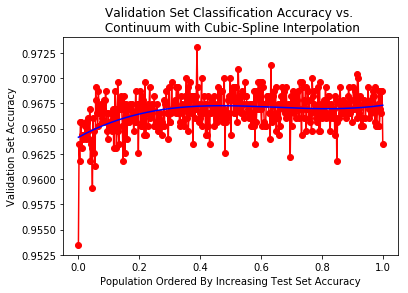

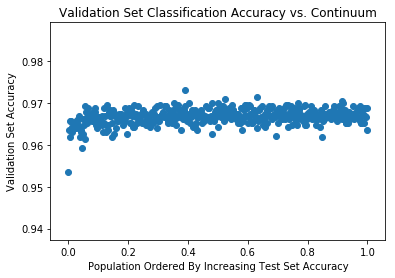

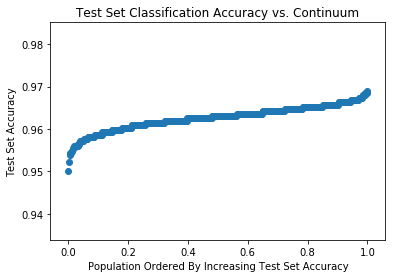

In [142]:
if __name__ == '__main__':

    '''
    First, we will apply random forest using all the features to acquire a baseline accuracy.
    '''
    individual = [1 for i in range(len(eeg_feature_transform.columns))]
    testAccuracy = getFitness(individual, X_train, X_test, y_train, y_test)
    validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
    print('\nTest accuracy with all features: \t' + str(testAccuracy[0]))
    print('Validation accuracy with all features: \t' + str(validationAccuracy[0]) + '\n')

    '''
    Now, we will apply a genetic algorithm to choose a subset of features that gives a better accuracy than the baseline.
    '''
    hof = getHof()
    testAccuracyList, validationAccuracyList, individualList, percentileList = getMetrics(hof)

    # Get a list of subsets that performed best on validation data
    maxValAccSubsetIndicies = [index for index in range(len(validationAccuracyList)) if validationAccuracyList[index] == max(validationAccuracyList)]
    maxValIndividuals = [individualList[index] for index in maxValAccSubsetIndicies]
    maxValSubsets = [[list(eeg_feature_transform)[index] for index in range(len(individual)) if individual[index] == 1] for individual in maxValIndividuals]

    print('\n---Optimal Feature Subset(s)---\n')
    for index in range(len(maxValAccSubsetIndicies)):
        print('Percentile: \t\t\t' + str(percentileList[maxValAccSubsetIndicies[index]]))
        print('Validation Accuracy: \t\t' + str(validationAccuracyList[maxValAccSubsetIndicies[index]]))
        print('Individual: \t' + str(maxValIndividuals[index]))
        print('Number Features In Subset: \t' + str(len(maxValSubsets[index])))
        print('Feature Subset: ' + str(maxValSubsets[index]))

    '''
    Now, we plot the test and validation classification accuracy to see how these numbers change as we move from our worst feature subsets to the 
    best feature subsets found by the genetic algorithm.
    '''
    # Calculate best fit line for validation classification accuracy (non-linear)
    tck = interpolate.splrep(percentileList, validationAccuracyList, s=5.0)
    ynew = interpolate.splev(percentileList, tck)

    e = plt.figure(1)
    plt.plot(percentileList, validationAccuracyList, marker='o', color='r')
    plt.plot(percentileList, ynew, color='b')
    plt.title('Validation Set Classification Accuracy vs. \n Continuum with Cubic-Spline Interpolation')
    plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
    plt.ylabel('Validation Set Accuracy')
    e.show()

    f = plt.figure(2)
    plt.scatter(percentileList, validationAccuracyList)
    plt.title('Validation Set Classification Accuracy vs. Continuum')
    plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
    plt.ylabel('Validation Set Accuracy')
    f.show()

    g = plt.figure(3)
    plt.scatter(percentileList, testAccuracyList)
    plt.title('Test Set Classification Accuracy vs. Continuum')
    plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
    plt.ylabel('Test Set Accuracy')
    g.show()

    input()

In [143]:
## Concanating PCA and Other Features
eeg_features_with_lables = pd.concat([eeg_feature_transform, eeg_y], axis = 1)

In [144]:
eeg_features_with_lables.to_csv("eeg_features.csv", encoding='utf-8', index=False)